## SCIKIT

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import pearsonr

### TECNICA PCA
    PCA(n_components=)
    .fit_transform()

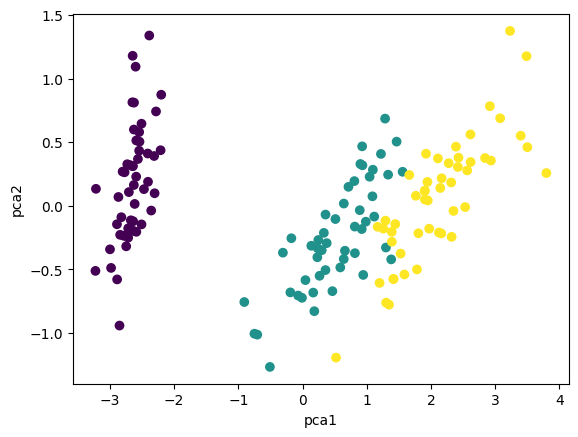

In [4]:
## SCIKIT PCA 

#utilizo de prueba el dataset iris. contiene 5 columnas con su especies
df = sns.load_dataset("iris") 
#.iloc[:] selecciona todas las filas, .iloc[:,:] selecciona todas las columnas, .iloc[:,:-1] elimino la ultima columna (especies)
df.iloc[:,:-1] 

#disminuyo los componentes a graficar de 5 a 2. pero con una relacion
pca_model = PCA(n_components=2)
#entrena al pca y lo devuelve transformado.
df_pca = pca_model.fit_transform(df.iloc[:,:-1]) 

#esto mostrara la matriz con datos distintos pero para ver el resultado final hay que graficar
df_pca
#grafico del pca
#c= meto el primer data original de iris. convertirlo en categoria y luego con .cat.codes para mostrar la categoria diferenciada
plt.scatter(df_pca[:,0], df_pca[:,1], c=df["species"].astype("category").cat.codes) 
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.show()

### TECNICA TRANSFORMACION DE VARIABLES
    np.log(df["variable"])

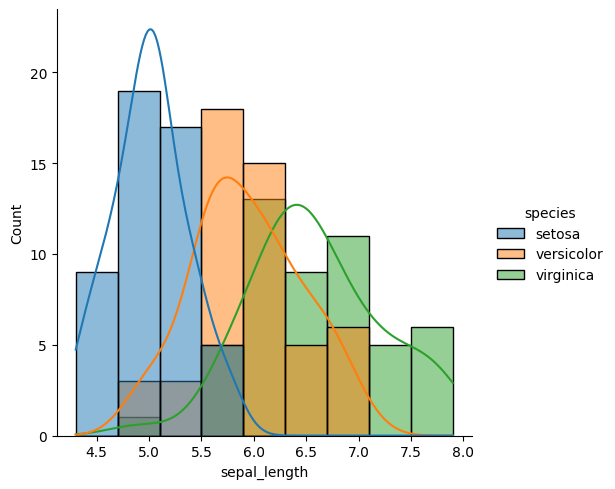

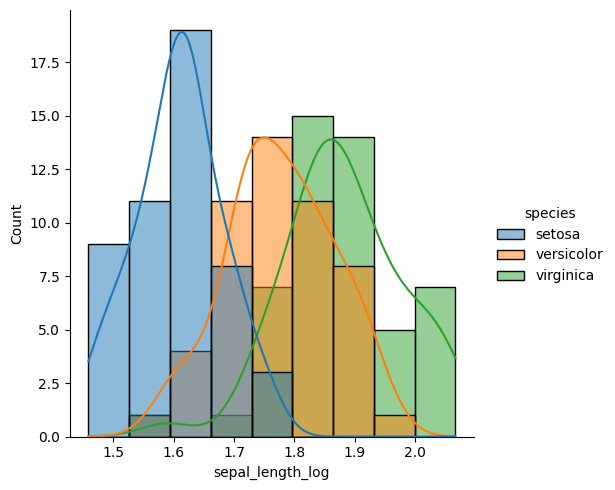

In [5]:
#pasamos de 5 columnas a solo 2. categorizadas por categorias de especies con la tecnica pca
#grafico para visualizar la distribucion numerica de una variable o categoria y comprender su dispersion o forma
sns.displot(data=df, x="sepal_length", hue="species", kde=True)
plt.show()
#mejoraremos la distribucion de estas variables con transformacion logaritmica
df["sepal_length_log"] = np.log(df["sepal_length"])

sns.displot(data=df, x="sepal_length_log", hue="species", kde=True)
#logaritmicamente a virginica le correspone mas distribucion

### TECNICA NORMALIZACION DE DATOS
    StandardScaler()
    .fit_transform(df.iloc[])
    MinMaxScaler()

In [13]:
std_scaler = StandardScaler()
#seleccionar solo variables numericas
df_std_scaler = std_scaler.fit_transform(df.iloc[:,:-2]) 
print(df_std_scaler)

mm_scaler = MinMaxScaler() 
#seleccionar solo variables numericas
df_normalized = mm_scaler.fit_transform(df.iloc[:,:-2])
print(df_normalized)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

### TECNICA DE CORRELACION (PEARSON)
    pearsonr(df["x"],df["y"])


In [15]:
# tecnica correlacion pearson
#correlacion = 1 los datos se ajustan perfectamente a una linea recta con pendiente positiva
# - 1 = lo contrario. con pendiente negativa
# entre -1 y 1 =  la pendiente y la varianza para ajustar la recta

# la correlacion no implica causalidad


#calcular la correlacion
correlacion, _ = pearsonr(df["sepal_length"], df["petal_length"])
correlacion

0.8717537758865832

### TECNICA ANALISIS DE CLUSTER 
    KMeans(n_clusters=)
    .fit_predict()

c:\Users\mauri\OneDrive\Escritorio\proyecto_datos\datos\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mauri\OneDrive\Escritorio\proyecto_datos\datos\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\mauri\OneDrive\Escritorio\proyecto_datos\datos\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


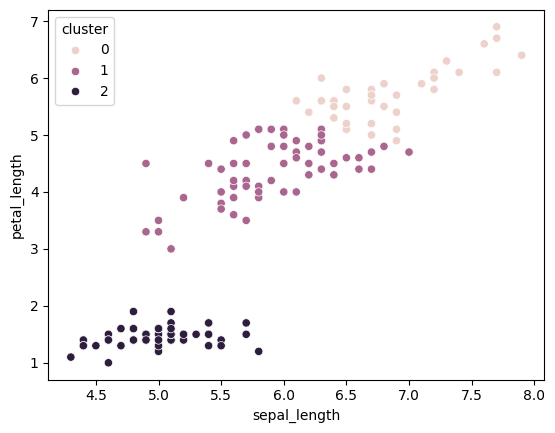

In [14]:

#cluster es un grupo de algoritmos no supervisados diseñados para identificar patrones en funcion de similitud y agrupar datos en conjunto
from sklearn.cluster import KMeans

#divide los datos en 3 clusters distintos
model = KMeans(n_clusters=3) 
#asigna a la columna cluster cada dato de las filas. excepto las ultimas 2 filas
df["cluster"] = model.fit_predict(df.iloc[:,:-2]) 
df

#ahora graficamos pero en ves de hue ser species sera cluster que tiene mas identificado lso patrones y separando en grupos
sns.scatterplot(data=df, x="sepal_length", y="petal_length", hue="cluster")
plt.show()